In [2]:
#일단 그래프 해상도 높이기: 기본DPI를 100으로 바꾸기
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

#6-1 객체지향 API로 그래프 꾸미기

**맷플롯립으로 그래프 그리는 방식**<BR>
* pyplot 방식
* 객체지향 API 방식

#### pyplot방식으로 그래프 그리기
matplotlib.pyplot에 있는 함수 사용하면 함수들이 하나의 피겨 객체에 대한 상태를 공유.

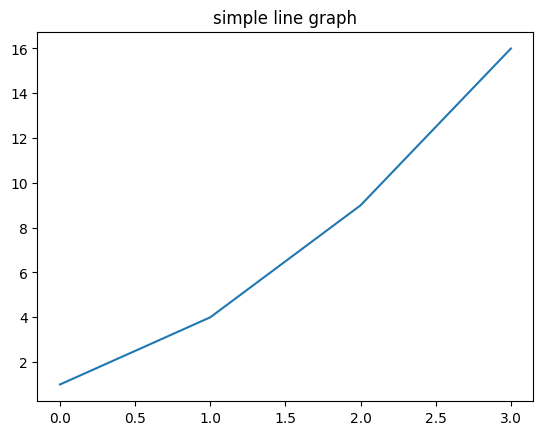

In [3]:
#아래 코드에서는 plot(),title()가 동일 피겨 객체에 적용되는 것
plt.plot([1, 4, 9, 16]) #리스트 형태로 데이터 전달.얘는 y값
#x값은 기본적으로 0부터 시작하는 정수 인덱스를 사용한다고 함
plt.title('simple line graph')
plt.show()

#### 객체지향 API 방식으로 그래프 그리기
피겨 객체와 Axes 객체를 사용하는 객체지향 API 방식으로 그리기<br>
복잡한 그래프 그릴 경우에는, 객체지향 방식이 더 적절

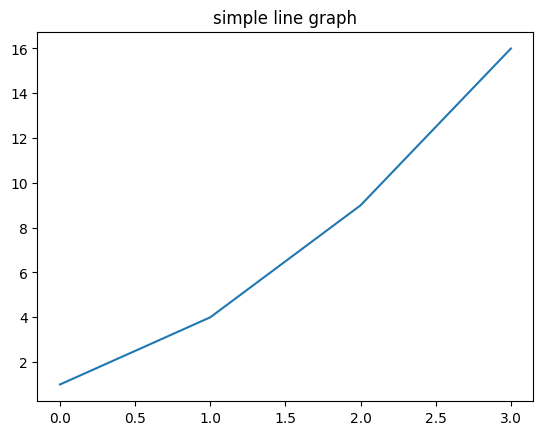

In [4]:
fig, ax = plt.subplots() #하나의 Axes 객체를 가지는 피겨 생성
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

### 그래프에 한글 출력

In [5]:
#나눔 폰트 설치
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [6]:
#다시 맷플롯립 임포트&DPI 기본값 변경
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100

맷플롯립 기본 폰트: 영문 sans-serif<br>
rcParams 객체의 'font.family' 속성에 저장되어있음

In [7]:
plt.rcParams['font.family']

['sans-serif']

**폰트 지정 방식 1. font.family 속성**

In [8]:
#나눔고딕 폰트 사용 지정
plt.rcParams['font.family'] = 'NanumGothic'

**폰트 지정 방식 2. rc()함수<br>**
첫 매개변수 = 설정할 그룹 지정<br>
두 번째 = 그룹 하위 속성<br>
family는 일반 키워드 매개변수처럼 사용하면 됨
* 그룹 내의 여러 설정을 동시에 지정할 수 있음

In [9]:
#font.family의 font는 그룹, family는 하위 속성
plt.rc('font', family='NanumBarunGothic')

In [10]:
#그룹 내의 여러 설정 동시 지정
#예시) 폰트 패밀리와 폰트 크기 동시 설정
plt.rc('font', family='NanumBarunGothic', size=11)

In [11]:
#rcParams 객체로 바뀐 내용 확인
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


**맷플롯립 사용 가능 폰트 전체 목록 조회**

In [12]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans

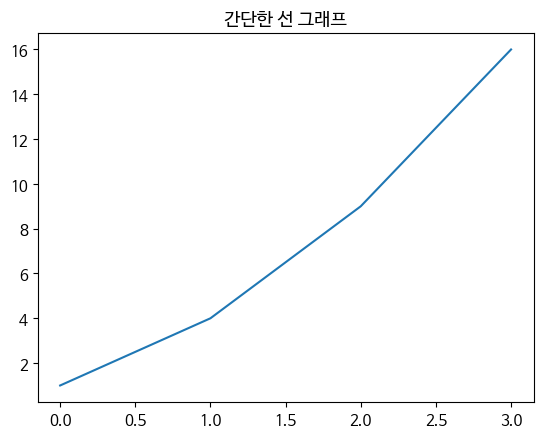

In [13]:
#앞에 그래프 제목 한글로 출력해보기
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [14]:
#폰트크기 기본값 10으로 다시 바꾸기
plt.rc('font', size=10)

### 출판사별 발행 도서 개수 산점도 그리기
출판사별 도서가 어떤 연도에 많이 발행되었는지 산점도로 확인

In [15]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 163MB/s]


'ns_book7.csv'

In [16]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


* x축:발행년도 / y축:출판사
* 편의상 발행 도서가 많은 상위 30개 출판사의 데이터 중 일부만 사용

In [17]:
#value_counts()메서드로 고유한 출판사 목록 만들기
#내림차순되는 것 잊지말기
#상위 30개 출판사 선택은 슬라이싱 연산자 사용
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [18]:
#상위 30개 출판사의 불리언 인덱스 만들기
#출판사가 top30목록에 있는 출판사에 해당하는지 검사하려면 isnin()메서드 사용
#해당하면 True, 아니면 False에 반환
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [19]:
top30_pubs_idx.sum() #상위30출판사에 해당하는 도서(True) 개수 세기

51886

### 5만개 중 1,000개만 선택 : sample()메서드
random_state 매개변수에 임의의 숫자=>넘파이의 seed()함수와 비슷한 역할=>앞으로 이 값을 전달하면 항상 같은 결과를 얻을 수 있음

In [20]:
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


### 산점도 그리기
x축:발행연도 y축:출판사

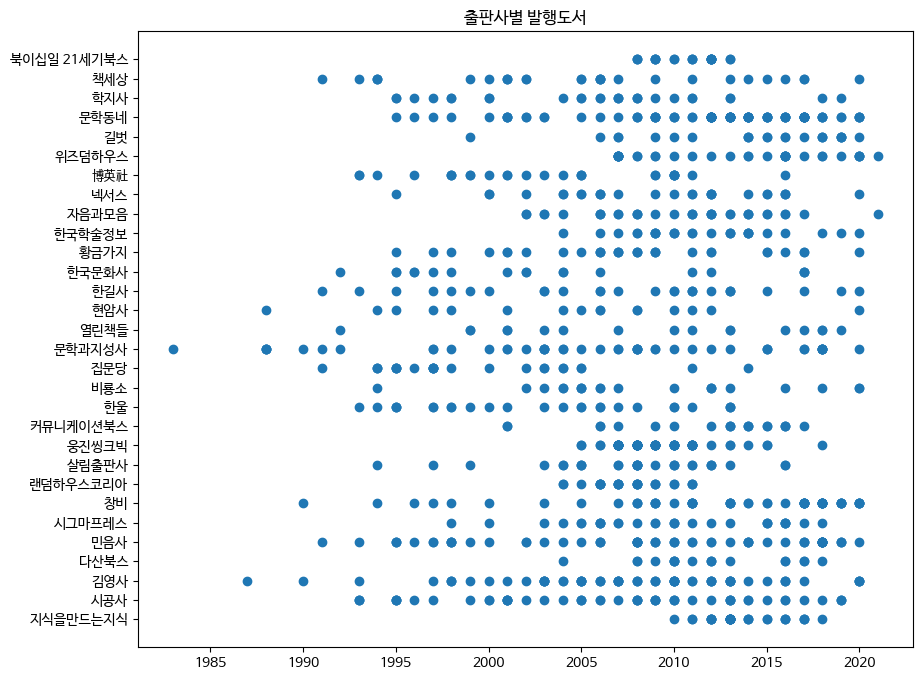

In [21]:
#크게그리기 위해 subplots()함수로 피겨의 크기 (10,8)로 지정=>객체지향 API사용하게 되는 것
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행도서')
fig.show()

#### 값에 따라 마커 크기 다르게 나타내기
어떤 연도에 도서가 많이 대출되었는지 시각적으로 보이도록 마커 크기 조절
* scatter()함수
 * s매개변수. 기본값=rcParams['lines.markersize']의 제곱
* 선 그래프, 산점도 마커 크기 : rcParams['lines.markersize']로 지정. 기본값=6
* s매개변수 값-하나의 실수로 지정 ->산점도의 모든 마커 크기가 동일해짐
* 입력 데이터와 동일한 길이의 배열 지정 -> 각 데이터마다 마커의 크기가 다른 산점도 그릴 수 있음

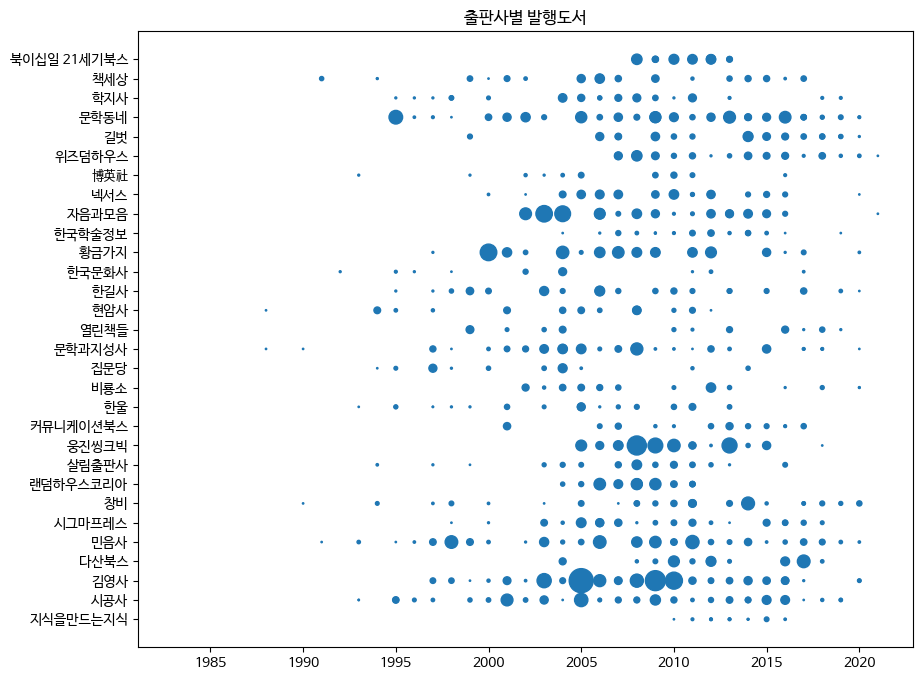

In [22]:
# '대출건수'열을 마커 크기로 전달하면, 대출건수 많은 도서를 상대적으로 크게 그릴 수 있음
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

=> 출판사의 연도별 도서 발행 여부 + 얼마나 많은 대출 발생 모두 보여주는 산점도!!!<br>
ex. '자음과모음' 출판사-> 2000년대 초반에 발행한 책의 대출건수가 높음

#### 산점도 마커 꾸미기
1. **투명도 조절하기 :alpha 매개변수<br>**
진함=해당 연도에 출간된 도서가 얼마나 많은지
2. **마커 테두리 색 바꾸기: edgecolor 매개변수<br>**
마커 테두리 색 결정. 기본값='face'(마커의 색 의미)<br> 테두리=여러 마커 겹칠 때 경계 구분 용이
3. **마커 테두리 선 두께 바꾸기: linewidths 매개변수<**br> 기본값=1.5
4. **산점도 색 바꾸기: c 매개변수<br>**
s매개변수처럼, 데이터 개수와 동일한 길이 배열 전달할 경우, 각 데이터를 다른 색깔로 그릴 수 있음.<br>ex. c매개변수=['대출건수'] -> 큰 값은 밝은 노랑, 낮은 값은 진한 녹색

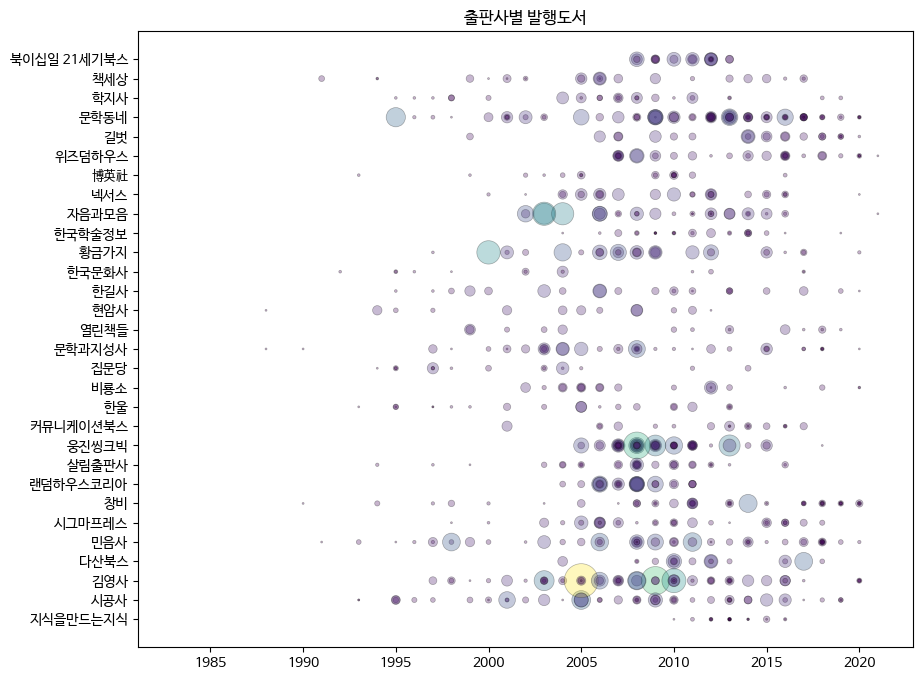

In [23]:
#s매개변수=대출건수*2로 마커 크기 잘보이게 키움
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],
           linewidths=0.5, edgecolors='k', alpha=0.3, #테두리선 뚜께는 0.5로, k는 검은색
           s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

이전보다 더 많은 정보를 얻을 수 있음. '황금가지'에서 발행한 도서 높은 대출건수 가진 책은 2000년에 발행된 도서. 다른 도서들은 대부분 2005년 이후 출간된 도서임을 알 수 있다.

#### 컬러맵: 값에 따라 색상 표현
앞에 산점도는 scatter()함수의 기본값인 viridis 컬러맵으로 표현된 것

---
자주 사용하는 다른 컬러맵: jet 컬러맵<br>
낮은 값일수록 짙은 파랑, ....노랑.....붉은 색


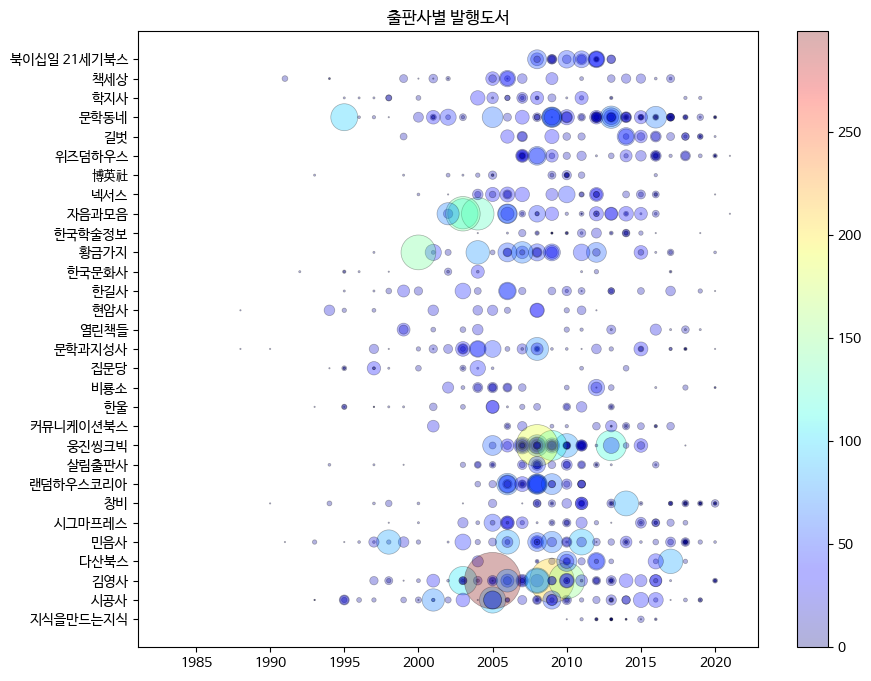

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet') #cmap 매개변수로 컬러맵 지정
ax.set_title('출판사별 발행도서')
#색깔이 어떤 대출건수 값에 대응하는지 참조 정보를 제공하는 컬러막대 그리기
#scatter()함수가 반환하는 객체를 colorbar()메서드에 전달하여 그림
fig.colorbar(sc)

fig.show()

마커 크기에 따라 데이터가 왜곡될 수 있음. 따라서 마커 크기를 사용해 데이터를 표현한다면 어떤 방식으로 그렸는지 정보 제공하는 것이 좋다.

# 6-2 맷플롯립 고급 기능
그래프 범례 추가 / 선+막대그래프 동시에 여러 개 그리기 / 피벗테이블 기능

In [25]:
#한글 폰트 설치
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [26]:
import matplotlib.pyplot as plt

# 나눔바른고딕 폰트로 기본값 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 DPI 기본값을 변경합니다.
plt.rcParams['figure.dpi'] = 100

In [27]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 164MB/s]


'ns_book7.csv'

In [28]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


### 하나의 피겨에 여러 개의 선 그래프 그리기
plot() 함수 여러 번 호출

출판사의 '발행년도'별 '대출건수'

In [29]:
#상위 30개 출판사 뽑기
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index) #불리언배열 반환

In [30]:
#출판사, 발행년도, 대출건수만 추출한 ns_book9 만들기
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
#groupby()메서드로 '출판사','발행년도'열을 기준으로 행을 모은 후, sum()메서드로 '대출건수'열의 합 구하기
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
#출판사마다 같은 연도 발행된 도서의 대출건수 합치기

In [31]:
#'출판사','발행년도'로 지정된 인덱스를 초기화
ns_book9 = ns_book9.reset_index()
#'황금가지' 출판사 데이터 뽑아오기
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


연도별로 대출건수 잘 집계된 것 확인 가능

#### 선그래프 2개 그리기
두 개의 출판사 데이터를 만들어서, '발행년도'에 대한 '대출건수' 선 그래프 그리기

In [32]:
#출판사별로 데이터프레임 만들기
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

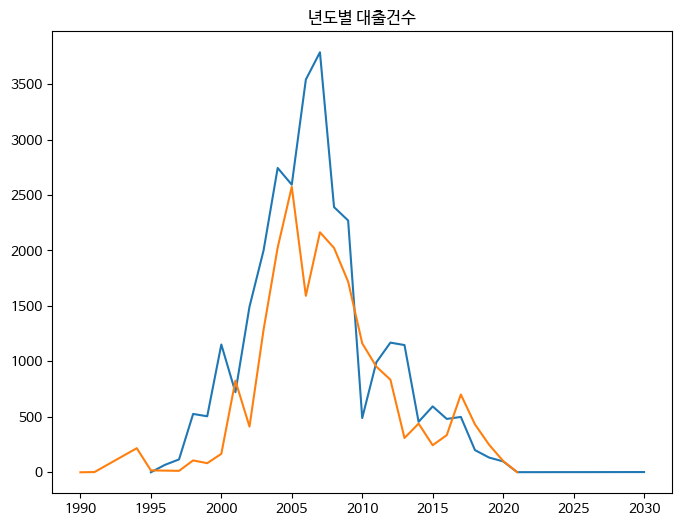

In [33]:
#각 데이터프레임의 '발행년도' 열과 '대출건수' 열로 plot()함수 두 번 호출
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수']) #x축,y축 지정
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

#### 범례legend 추가해서 그래프 그리기
맷플롯립은 10가지 색으로 그래프 그리고, 10개 넘으면 썼던 색 또 씀 -> 범례 사용하면 보기 편함<br>
plot()함수 호출할 때 **선 그래프에 레이블lable 추가**하고, **마지막에 legend()메서드 호출**하면 됨

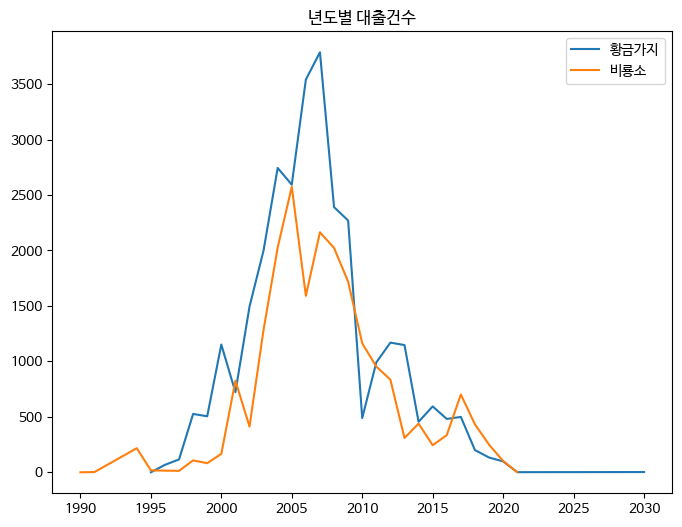

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

#### 선그래프 5개 그리기
상위 5개 출판사의 '발행년도'에 대한 '대출건수' 그래프 그리기 <br>
5개 출판사의 데이터프레임 각각 만들지 않고, for문과 슬라이스 연산자 사용

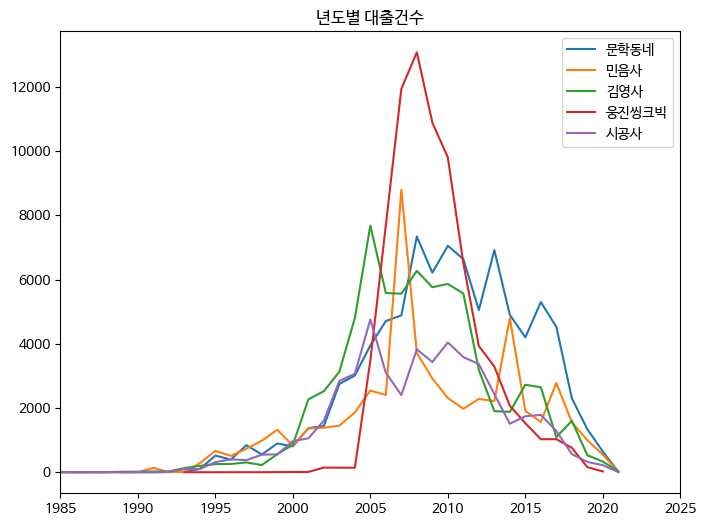

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub] #상위 5개 출판사 선택
    ax.plot(line['발행년도'], line['대출건수'], label=pub) #5개 그래프 그리기
ax.set_title('년도별 대출건수')
ax.legend()
#set_xlim()메서드: x축 범위지정 /y축은 set_ylim()(API방식 이용시)
#그래프 치우침 방지하기 위해 대부분의 대출건수가 발생한 1990년대 데이터 중점적으로 보이게 하기 위함
ax.set_xlim(1985, 2025) #1985~2025 x축 범위 선택
fig.show()

cf) pyplot쓸때는 그냥 xlim(), ylim()쓰면됨<br>
axis()함수로 x축,y축 범위 동시 설정도 가능하고. 근데 axis()쓸때는 범위를 리스트로 묶어서 해야함<br>
ex) 발행년도:1985-2025 / 대출건수:0-13000 <br>
plt.axis([1985,2025,0,13000])<br>
axis()는 객체지향 API에서도 동일한 이름을 사용함.(set_axis가아니고, 그냥 axis)


### 스택 영역 그래프 그리기
위 그래프처럼 선이 많이 교차하면 보기 어려움. 이럴 때 스택 영역 그래프가 적합<br> 그래프 위에 그래프 쌓는 것->
그래프 사이의 간격이 y축의 값이 됨<br>
stackplot()메서드<br>
첫 매개변수=x축 값 / 두 번째= y축 값



---
x축 '발행년도' y축 값 2차원 배열로 전달해야함(행=출판사 열=발행년도)<br>
ns_book9의 '발행년도' 열의 개별 값을 하나의 열로 구성한 뒤,<br>
상위 10개 출판사의 연도별 대출건수를 스택 영역 그래프로 그리기


---

1. pivot_table()메서드로 각 '발행년도' 열의 값을 열로 바꾸기(y축에 넣을 2차원 배열 만들기)
2. '발행년도'열을 리스트 형태로 바꾸기(x축에 넣을 리스트 만들기)
3. stackplot()메서드로 스택 영역 그래프 그리기

#### #1.pivot_table()메서드로 각 '발행년도' 열의 값을 열로 바꾸기
index매개변수='출판사' / columns매개변수='발행년도' 열 지정

In [36]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [37]:
#열이 다단으로 되어있음('대출건수',1947)
#columns속성으로 확인
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

#### 2.'발행년도'열을 리스트 형태로 바꾸기(x축에 넣을 리스트 만들기)
판다스 인덱스 객체에서 get_level_values()메서드 호출해서, 다단으로 구성된 열 이름에서 선택한 항목만 가져오기->('대출건수',1947')에서 연도만 가져오기

In [38]:
top10_pubs = top30_pubs.index[:10] #상위10개 출판사
year_cols = ns_book10.columns.get_level_values(1)

#### 3.stackplot()메서드로 스택 영역 그래프 그리기
x축,y축에 전달할 값 준비는 끝났고, stackplot()메서드 써서 그래프 그리면 됨

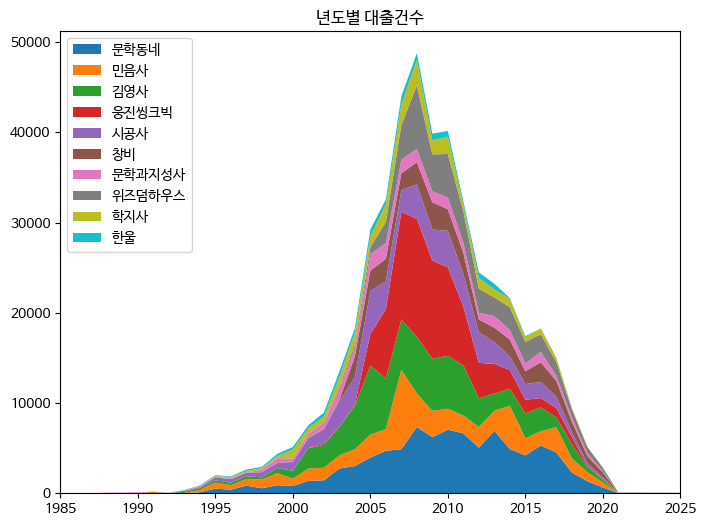

In [39]:
#범례는 출판사 이름으로 #x축에는 year_cols, y축에는 ns_book10에서  상위 10개 출판사에 해당하는 행을 전달
#legend() 메서드는 loc매개변수로 범례의 위치 지정 가능
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs) #fillna()메서드로 누락된 값을 0으로 채워서 그래프 왜곡 방지

ax.set_title('년도별 대출건수')
ax.legend(loc='upper left') #범례를 왼쪽 상단에 표시
ax.set_xlim(1985, 2025)
fig.show()

### 하나의 피겨에 여러 개의 막대 그래프 그리기
bar()메서드 여러 번 호출

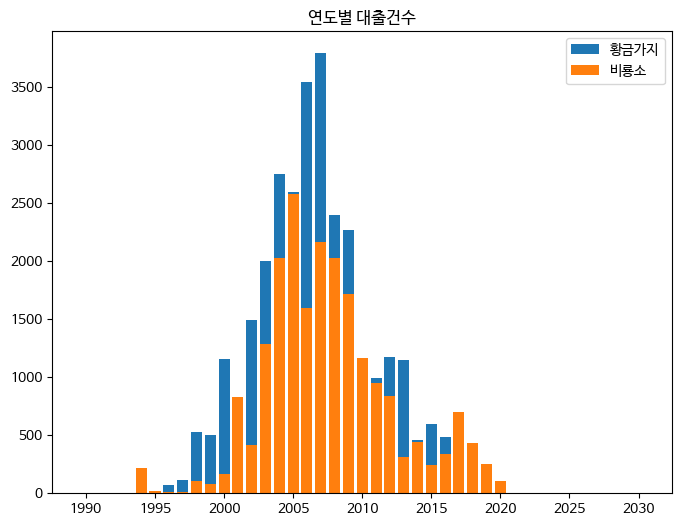

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

그냥 bar()여러번 호출->먼저 그린 막대를 덮어쓰게 됨=>부적절!

#### 두 출판사의 막대 나란히 그리기
막대 기본 너비 0.8->0.4로 그리기<br>
막대 간격은 0.2로

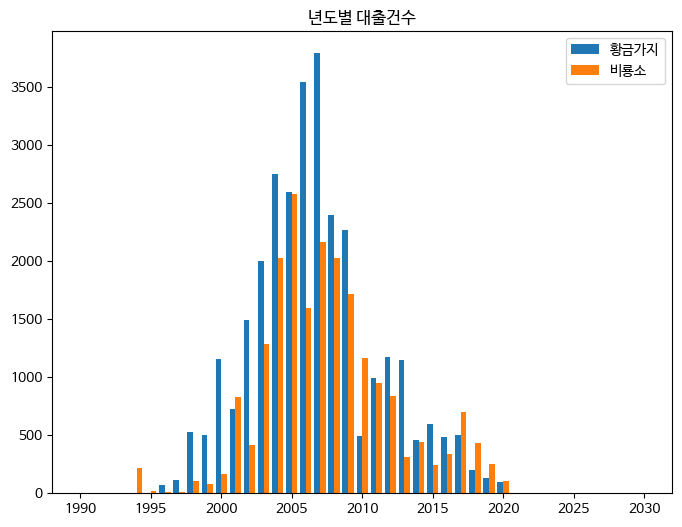

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지') #막대위치 0.2이동
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

#### 스택 막대 그래프:위로 쌓는 그래프
여러 개의 막대를 표현하는 데 좋음<br>
stackplot()처럼 딱 막대쌓는 메서드는 없는데, bar()메서드의 bottom매개변수로 수동으로 막대 쌓을 수 있

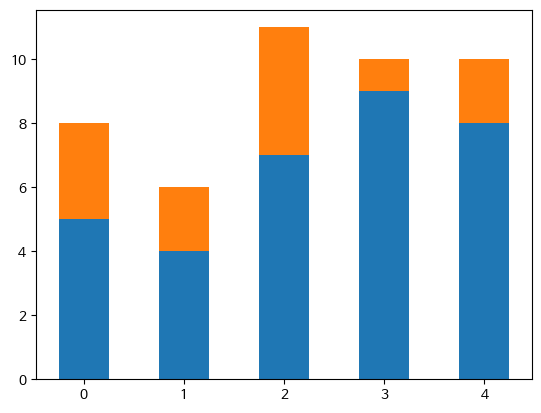

In [44]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5) #botto,=height로 설정
plt.show()

근데 그래프 그릴때마다 시작 위치 누적해야햐서 귀찮음<br>


#### 그래프 그리기 전에 막대 길이를 누적해놓고, 그 값으로 그래프 그리는 방법

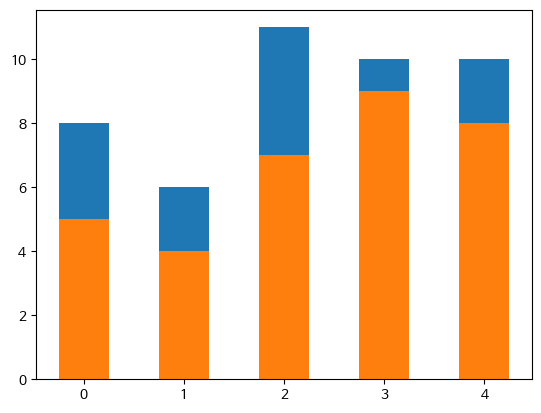

In [45]:
#height1 + height2 = height3 을 만들어놓고, height3 그린 다음에 height1 그리기
height3 = [a + b for a, b in zip(height1, height2)] #리스트 내포 사용하기
#zip함수로 양쪽의 데이터를 하나씩 엮어주
plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()
#큰 그래프 그려서 틀 잡아놓고 그 안에 채우는 느낌인듯?

### 데이터값 누적하여 그리기
cumsum()메서드

In [46]:
# ns_book10 데이터프레임에서 상위 다섯 개 출판사의 2103~2020 대출건수 확인
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [48]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

**막대 그래프 쌓아서 그리기**<br>
가장 큰 막대 먼저 그려야 함!!
* range()함수로 ns_book12 데이터프레임 행 개수만큼 인덱스 번호 만들기
* for문에 reversed()함수로 인덱스의 역순으로 반복하여 그리기

In [50]:
#ns_book10 데이터프레임 전체에 cumsum()메서드 적용
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

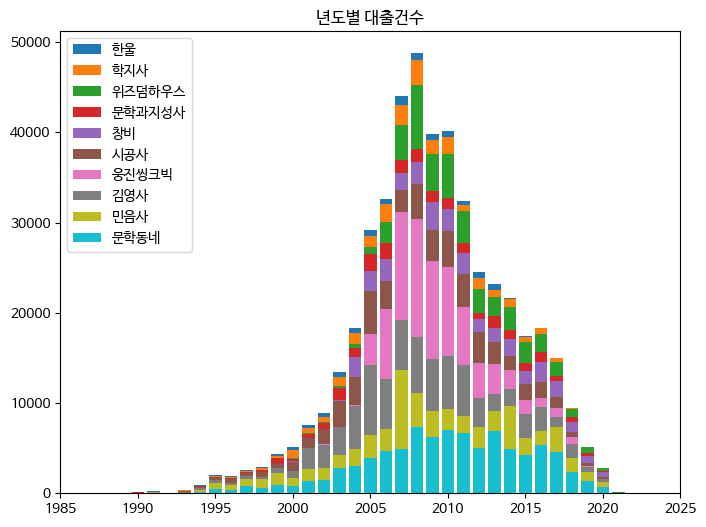

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    ax.bar(year_cols, bar, label=label)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

## 원그래프 그리기(파이차트)
pie()메서드<br>
* 첫 번째 매개변수=정의한 data 전달
* labels 매개변수에 표시할 내용 전달
* 3시 방향부터 반시계 방향으로 시작

In [52]:
#상위 10개 출판사의 도서 개수, 인덱스 저장
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

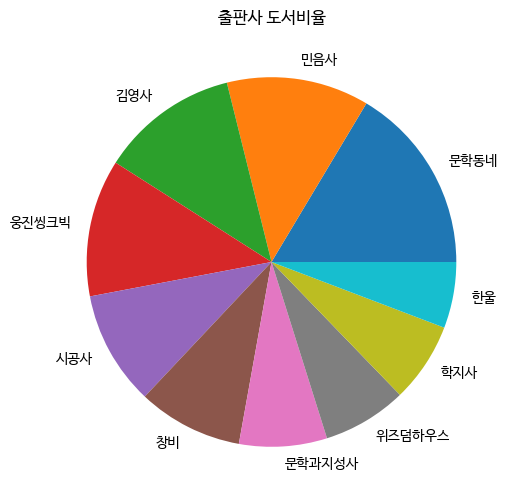

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')
fig.show()

원 그래프 단점: 한 눈에 크기 비교 어려움

#### 두 개의 데이터만 있는 경우: 12시방향부터 시작하기
strtangle 매개변수=90

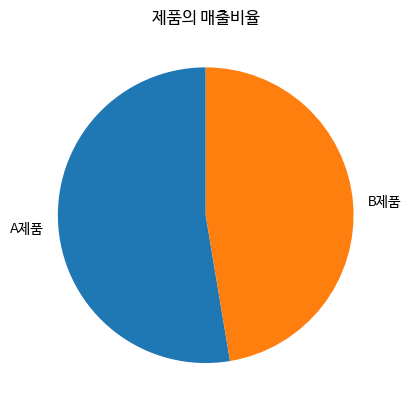

In [54]:

plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90)
plt.title('제품의 매출비율')
plt.show()

#### 비율 표시하고 부채꼴 강조하기
* pie() 메서드의 autopct매개변수<br>
 *  %d 전달하면, 각 부채꼬르이 비율이 정수로 표시됨
* explode 매개변수: 중요한 부채꼴 그래프에서 떨어뜨려 강조하기. 떨어뜨리길 원하는 조각의 간격을 반지름의 비율로 지정

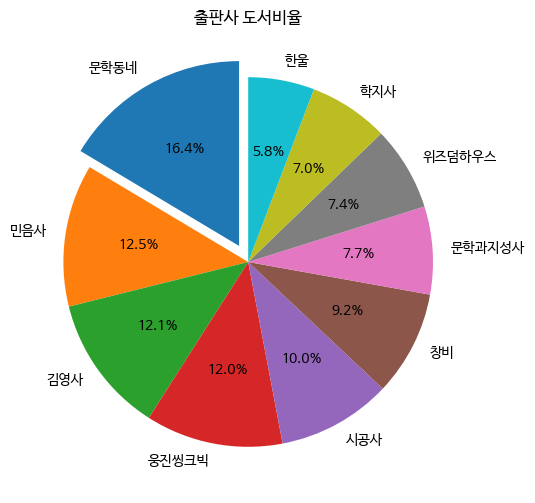

In [55]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90,
       autopct='%.1f%%', explode=[0.1]+[0]*9)  #.1: 소수점 첫째 자리까지 표시하라
       #첫 번째 항목을 0.1 떨어뜨리고 나머지는 다 0(안떨)
ax.set_title('출판사 도서비율')
fig.show()

## 여러 종류의 그래프가 있는 서브플롯 그리기
subplots(2,2) : 2*2 형태의 서브플롯<br>
axes[0,0] 제2사분면 / axes[0,1]제1사분면 / axes[1,0] 제3사분면 / axes[1,1]제4사분면

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'],
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행도서')
fig.colorbar(sc, ax=axes[0, 0])

# 스택 선 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0),
                     labels=top10_pubs)
axes[0, 1].set_title('년도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('년도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서비율')

fig.savefig('all_in_one.png') #png파일 저
fig.show()